# 安装环境

In [2]:
# 检查 Pytorch
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('CUDA 是否可用',torch.cuda.is_available())

Pytorch 版本 1.9.0+cu111
CUDA 是否可用 True


In [3]:
"""!pip3 install openmim
!mim install 'mmcv>=2.0.0'
!mim install 'mmengine'"""

"!pip3 install openmim\n!mim install 'mmcv>=2.0.0'\n!mim install 'mmengine'"

In [4]:
# 检查 mmcv
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV版本', mmcv.__version__)
print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())

MMCV版本 2.0.0
CUDA版本 11.1
编译器版本 GCC 7.3


In [5]:
!rm -rf mmagic # 删除原有的 mmagic 文件夹（如有）

In [9]:
!git clone https://github.com/open-mmlab/mmagic.git # 下载 mmagic 源代码

Cloning into 'mmagic'...
remote: Enumerating objects: 25636, done.
remote: Counting objects: 100% (3600/3600), done.
remote: Compressing objects: 100% (1572/1572), done.
remote: Total 25636 (delta 2011), reused 3200 (delta 1975), pack-reused 22036
Receiving objects: 100% (25636/25636), 21.60 MiB | 10.31 MiB/s, done.
Resolving deltas: 100% (17169/17169), done.


In [1]:
import os
os.chdir('mmagic')

In [11]:
!pip3 install -e .

Looking in indexes: https://repo.huaweicloud.com/repository/pypi/simple
Obtaining file:///root/workspace/04MMagic/mmagic
  Running setup.py develop for mmagic


In [14]:
# 检查 mmagic
import mmagic
print('MMagic版本', mmagic.__version__)

MMagic版本 1.0.2dev0


In [13]:
!pip install opencv-python pillow matplotlib seaborn tqdm -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install clip transformers gradio 'httpx[socks]' diffusers==0.14.0 -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


# 黑白照片上色

In [19]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230613-MMagic/data/test_colorization.jpg -O data/test_colorization.jpg

--2023-06-15 16:17:46--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230613-MMagic/data/test_colorization.jpg
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30466 (30K) [image/jpeg]
Saving to: ‘data/test_colorization.jpg’

data/test_colorizat 100%[===================>]  29.75K  --.-KB/s    in 0.06s   

2023-06-15 16:17:46 (491 KB/s) - ‘data/test_colorization.jpg’ saved [30466/30466]



In [20]:
from PIL import Image

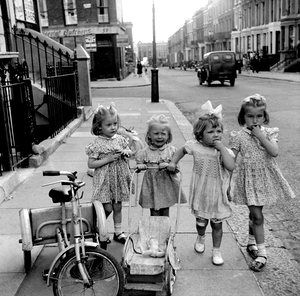

In [21]:
Image.open('data/test_colorization.jpg')

In [22]:
# 运行预测
!python demo/mmagic_inference_demo.py \
        --model-name inst_colorization \
        --img data/test_colorization.jpg \
        --result-out-dir outputs/out_colorization.png

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/inst_colorization/inst-colorizatioon_full_official_cocostuff-256x256-5b9d4eee.pth
06/15 16:18:13 - mmengine - WARNING - Failed to search registry with scope "mmagic" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmagic" is a correct scope, or whether the registry is initialized.
06/15 16:18:13 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_x101_32x8d_fpn_mstrain-poly_3x_coco/mask_rcnn_x101_32x8d_fpn_mstrain-poly_3x_coco_20210607_161042-8bd2c639.pth
06/15 16:18:14 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/

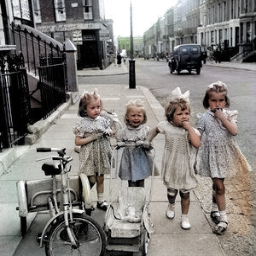

In [23]:
Image.open('outputs/out_colorization.png')

# 文生图(stable_diffusion)

In [2]:
from mmagic.apis import MMagicInferencer

In [3]:
sd_inferencer = MMagicInferencer(model_name='stable_diffusion')

06/15 16:26:06 - mmengine - INFO - Creating runwayml/stable-diffusion-v1-5 by 'HuggingFace'
06/15 16:26:11 - mmengine - WARNING - Failed to search registry with scope "mmagic" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmagic" is a correct scope, or whether the registry is initialized.


In [4]:
text_prompts = 'A Persian cat walking in the streets of Bei Jing'

In [6]:
sd_inferencer.infer(text=text_prompts, result_out_dir='outputs/sd_res.png')

  0%|          | 0/50 [00:00<?, ?it/s]

({'infer_results': <PIL.Image.Image image mode=RGB size=512x512>},
 <PIL.Image.Image image mode=RGB size=512x512>)

In [8]:
text_prompts = 'A panda is having dinner at Mcdonalds'

In [9]:
sd_inferencer.infer(text=text_prompts, result_out_dir='outputs/sd_res2.png')

  0%|          | 0/50 [00:00<?, ?it/s]

({'infer_results': <PIL.Image.Image image mode=RGB size=512x512>},
 <PIL.Image.Image image mode=RGB size=512x512>)

In [11]:
# 剩下示例先不试了，太占存储空间了

# 图生图

In [2]:
# 导入工具包
import cv2
import numpy as np
import mmcv
from mmengine import Config
from PIL import Image

from mmagic.registry import MODELS
from mmagic.utils import register_all_modules

register_all_modules()

In [5]:
# 载入ControlNet模型
cfg = Config.fromfile('configs/controlnet/controlnet-canny.py')
controlnet = MODELS.build(cfg.model).cuda()

06/15 17:26:38 - mmengine - INFO - Set model dtype to 'torch.float32'.


06/15 17:29:20 - mmengine - INFO - Creating runwayml/stable-diffusion-v1-5 by 'HuggingFace'


Do not support Xformers. Please install Xformers first. The program will run without Xformers.


06/15 17:30:24 - mmengine - INFO - Set model dtype to 'torch.float32'.
Do not support Xformers. Please install Xformers first. The program will run without Xformers.


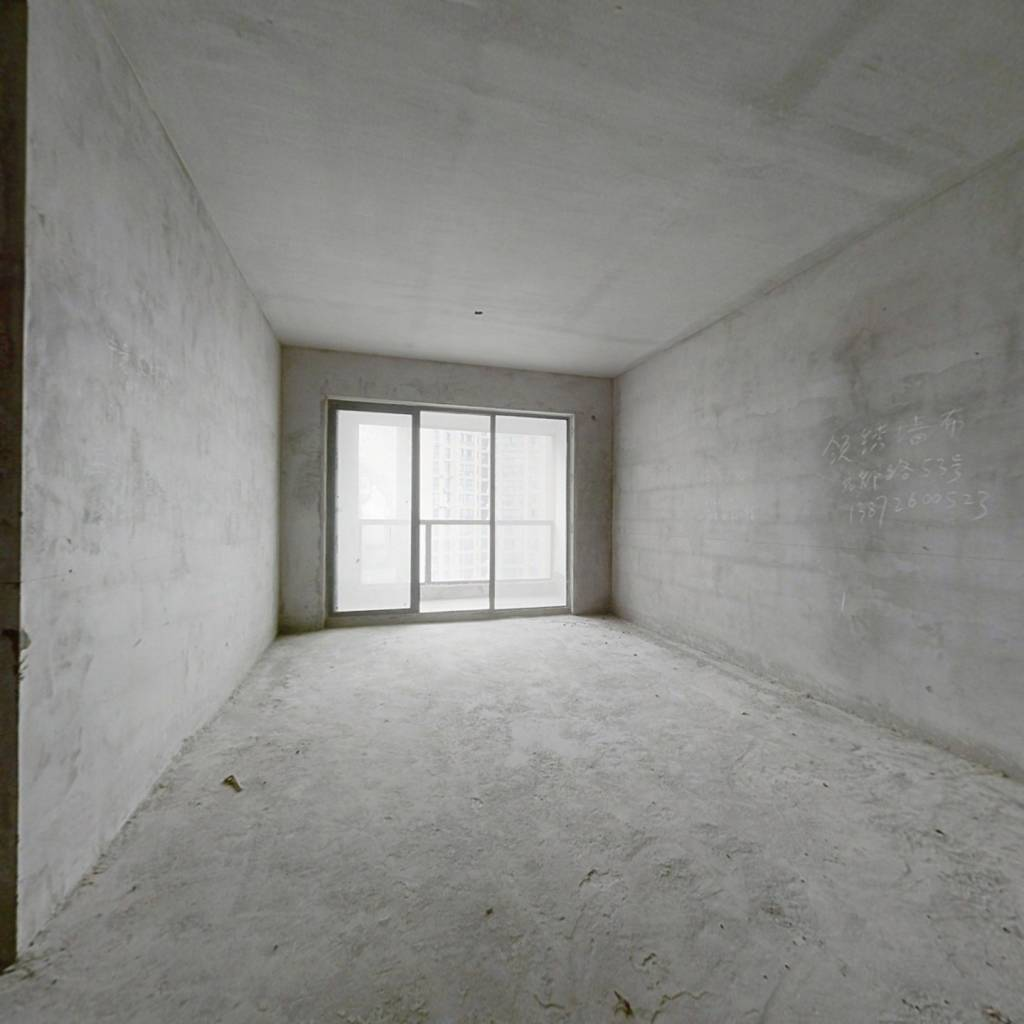

In [8]:
Image.open('data/roughcast_house.jpg')

In [11]:
control_img = mmcv.imread('data/roughcast_house.jpg')
control = cv2.Canny(control_img, 100, 200)
control = control[:, :, None]
control = np.concatenate([control] * 3, axis=2)
control = Image.fromarray(control)

In [12]:
type(control)

PIL.Image.Image

In [16]:
prompt = 'Room with royal style.'

In [20]:
output_dict = controlnet.infer(prompt, control=control)
samples = output_dict['samples']
for idx, sample in enumerate(samples):
    sample.save(f'outputs/sample_{idx}.png')
controls = output_dict['controls']
for idx, control in enumerate(controls):
    control.save(f'outputs/control_{idx}.png')

100%|██████████| 20/20 [00:03<00:00,  6.51it/s]


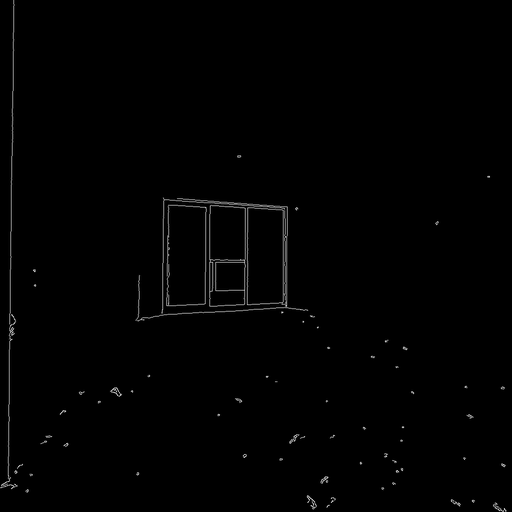

In [21]:
Image.open('outputs/control_0.png')

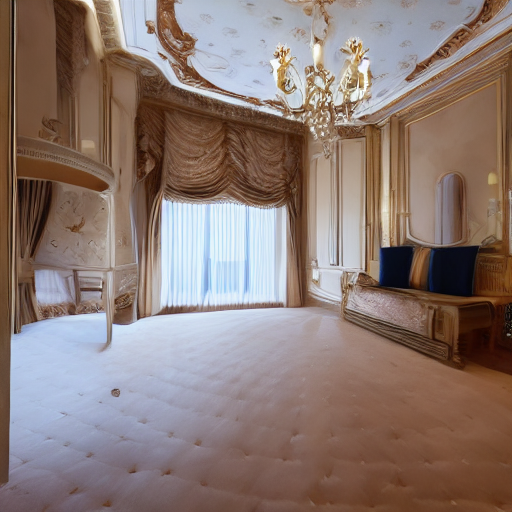

In [22]:
Image.open('outputs/sample_0.png')